In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AMD.csv")

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2335 non-null   int64  
 1   Open       2335 non-null   float64
 2   High       2335 non-null   float64
 3   Low        2335 non-null   float64
 4   Close      2335 non-null   float64
 5   Adj Close  2335 non-null   float64
 6   Volume     2335 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 127.8 KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,6.434732,6.563961,6.300887,6.433221,6.433221,3.107491e+07
std,3.872391,3.954999,3.792914,3.879124,3.879124,2.791149e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.480000,3.550000,3.405000,3.465000,3.465000,1.421670e+07
50%,5.580000,5.720000,5.450000,5.600000,5.600000,2.228020e+07
75%,8.555000,8.710000,8.375000,8.565000,8.565000,3.776905e+07
max,25.510000,27.299999,24.629999,25.260000,25.260000,3.250584e+08


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
1,2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2,2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600
3,2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900
4,2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2330,2018-08-23,21.190001,22.320000,21.139999,22.290001,22.290001,113444100
2331,2018-08-24,22.910000,24.000000,22.670000,23.980000,23.980000,164328200
2332,2018-08-27,24.940001,27.299999,24.629999,25.260000,25.260000,325058400
2333,2018-08-28,25.510000,26.180000,24.040001,25.049999,25.049999,215771200
2334,2018-08-29,24.360001,25.410000,24.010000,25.200001,25.200001,143079800


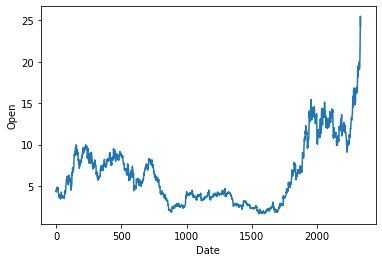

In [16]:
sns.lineplot(x=data['Date'],y=data['Open'])

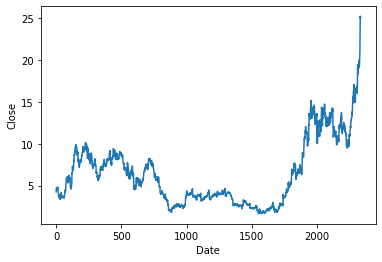

In [18]:
sns.lineplot(x=data['Date'],y=data['Close'])

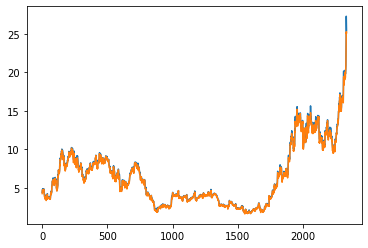

In [9]:
plt.plot(data['High'])
plt.plot(data['Close'])

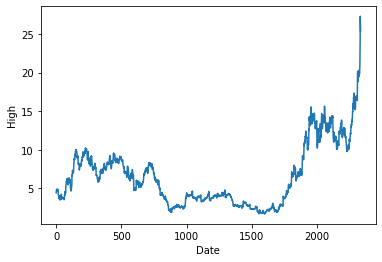

In [17]:
sns.lineplot(x=data['Date'],y=data['High'])

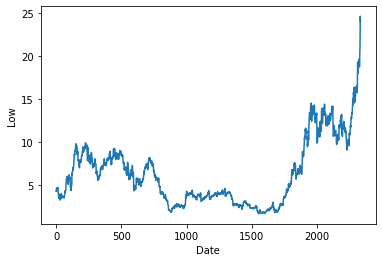

In [19]:
sns.lineplot(x=data['Date'],y=data['Low'])

In [12]:
data['Date']=[i for i in range(0,2335)]

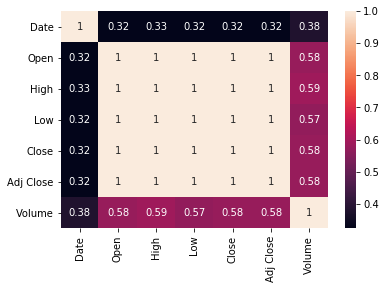

In [13]:
sns.heatmap(data.corr(),annot=True)

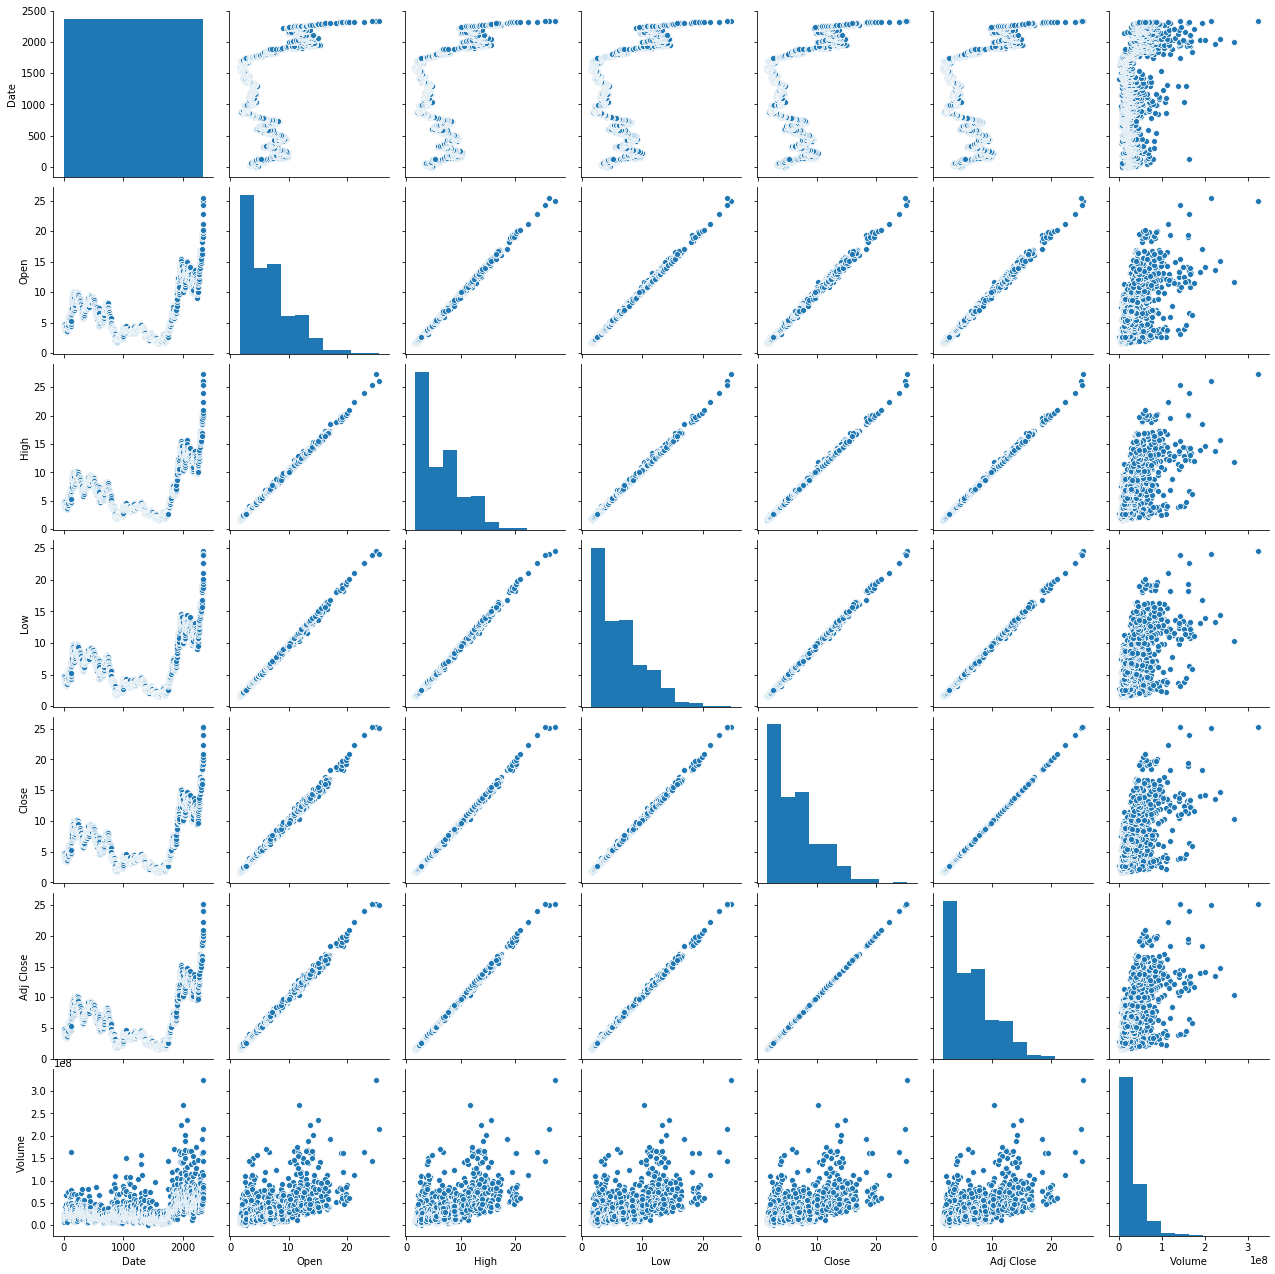

In [35]:
sns.pairplot(data)

In [20]:
x=data.drop(['Date','Close','Adj Close','Volume'],axis=1).values
y=data['Close'].values
x

array([[ 4.43    ,  4.43    ,  4.25    ],
       [ 4.26    ,  4.57    ,  4.23    ],
       [ 4.57    ,  4.8     ,  4.55    ],
       ...,
       [24.940001, 27.299999, 24.629999],
       [25.51    , 26.18    , 24.040001],
       [24.360001, 25.41    , 24.01    ]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
test = [[51.85,51.95,49.45]]
test_pred =lr.predict(test)
test_pred

array([50.09161064])

In [24]:
y_pred =lr.predict(x_test)
predictions = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
0,14.38,13.976029
1,2.86,2.933419
2,12.02,12.005906
3,2.62,2.639297
4,12.90,12.577307
...,...,...
766,1.88,1.876798
767,6.22,6.195596
768,2.32,2.322991
769,8.38,8.506444


In [25]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(x_train,y_train)

reg_pred = reg.predict(x_test)
reg_pred

array([14.12013952,  2.92404328, 11.97591831,  2.67781286, 12.75724663,
        2.4867693 ,  2.16828401,  3.95481813, 15.09260325,  7.07876889,
        8.40542735, 10.10921278,  3.85542904,  8.56942215,  1.9017542 ,
       13.55721178,  7.44013236,  2.30356445,  5.93316925,  9.2963816 ,
        4.11091104,  1.84652644,  4.09166772,  2.1586158 , 10.89408075,
        2.00910836,  3.6165798 ,  7.47575236,  6.55602393,  2.25877833,
        6.48622397,  8.43205949,  7.29630296,  6.12433917,  2.75612913,
        8.24081875,  8.16925186,  2.06728487,  6.120483  , 12.28193528,
        7.5706501 , 12.5591378 ,  1.87152625, 11.14259882,  3.08283221,
        2.85632492,  8.13293015,  5.7175535 ,  3.80599104, 12.54398138,
       12.02824586,  8.87824687, 13.03689548,  3.6563496 ,  3.64295922,
        6.41316514, 14.61656335, 12.793011  , 11.64738572,  5.07830352,
        4.41275594,  9.3061838 ,  7.36233344,  3.84830059,  3.78491058,
        5.01704428,  9.0728197 ,  6.51484126,  3.81938142,  9.93

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_pred)

0.01855280742920791

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.007884538676301255

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9994795623045905

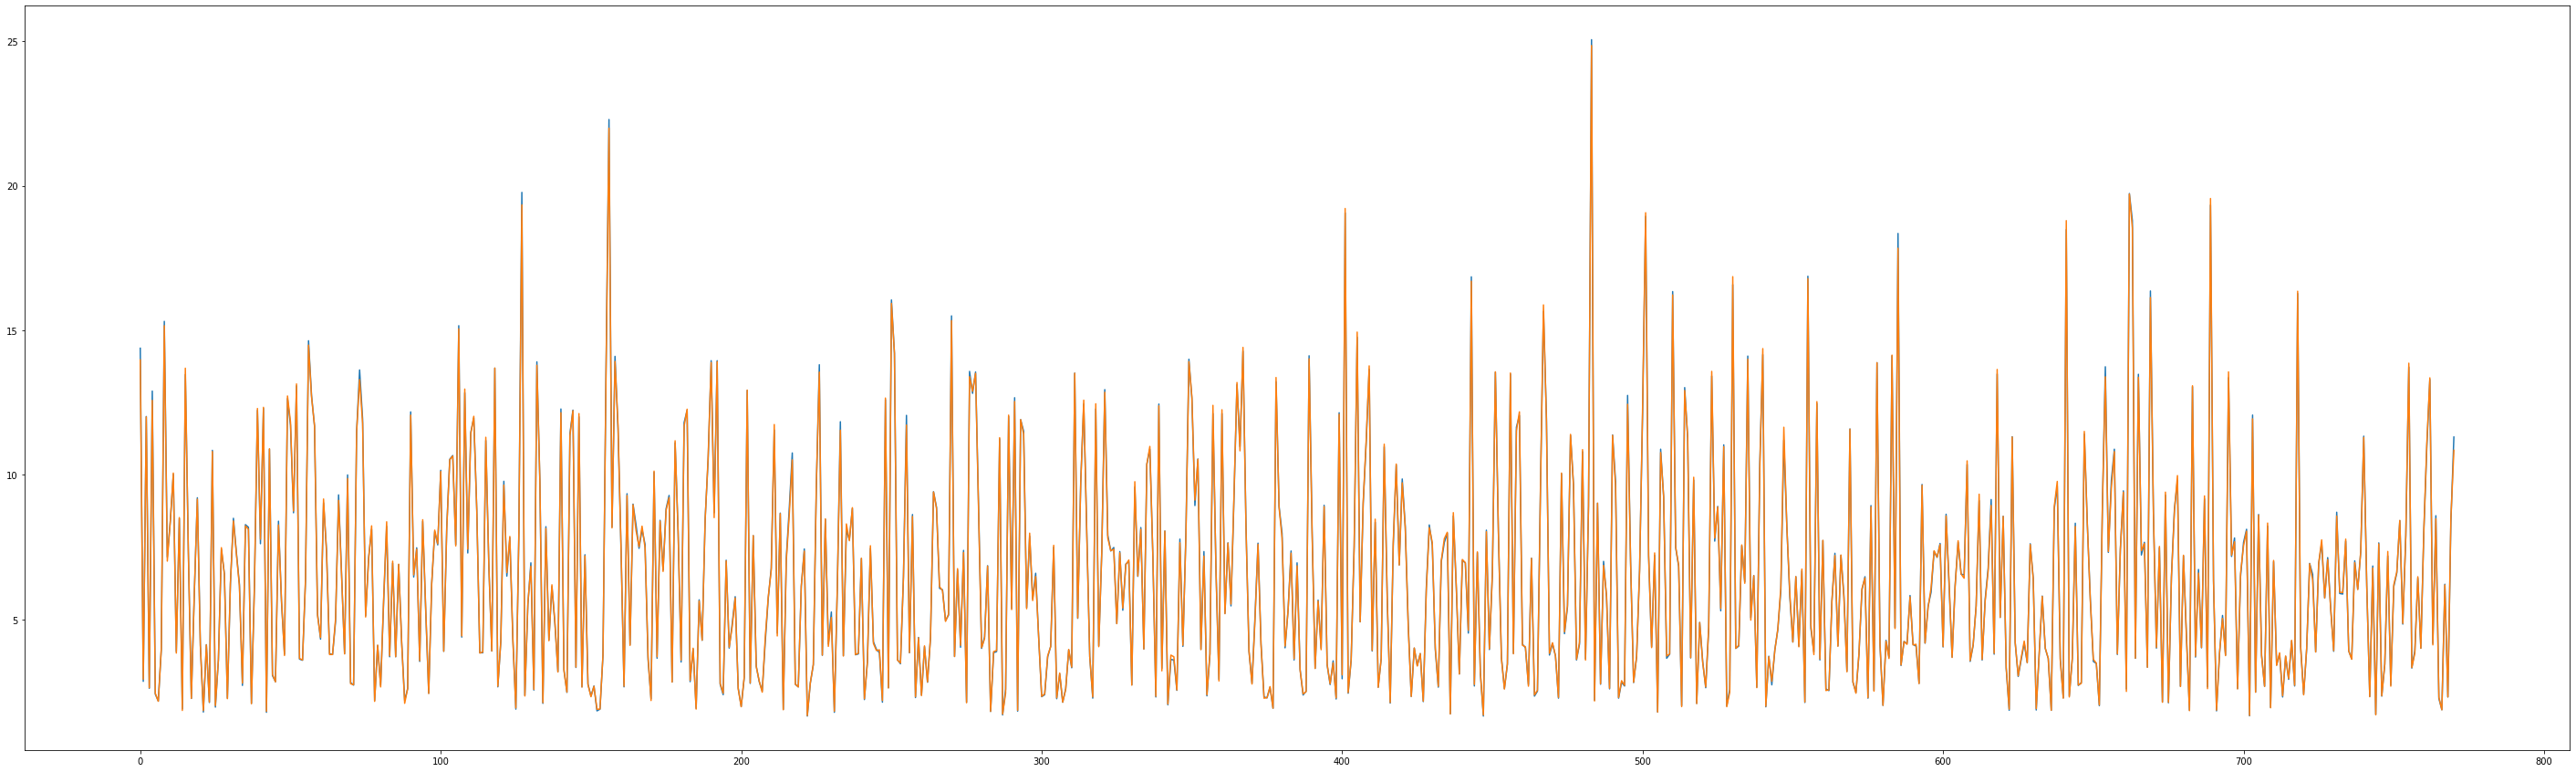

In [28]:
plt.figure(figsize=(50,15))
plt.plot(y_test)
plt.plot(y_pred)

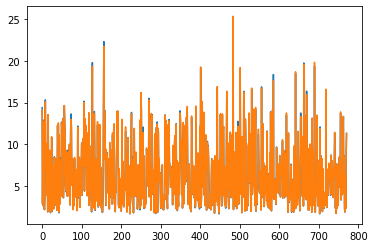

In [29]:
plt.plot(y_test)
plt.plot(reg_pred)

In [31]:
x_train.shape

(1564, 3)

In [32]:
y_train.shape

(1564,)

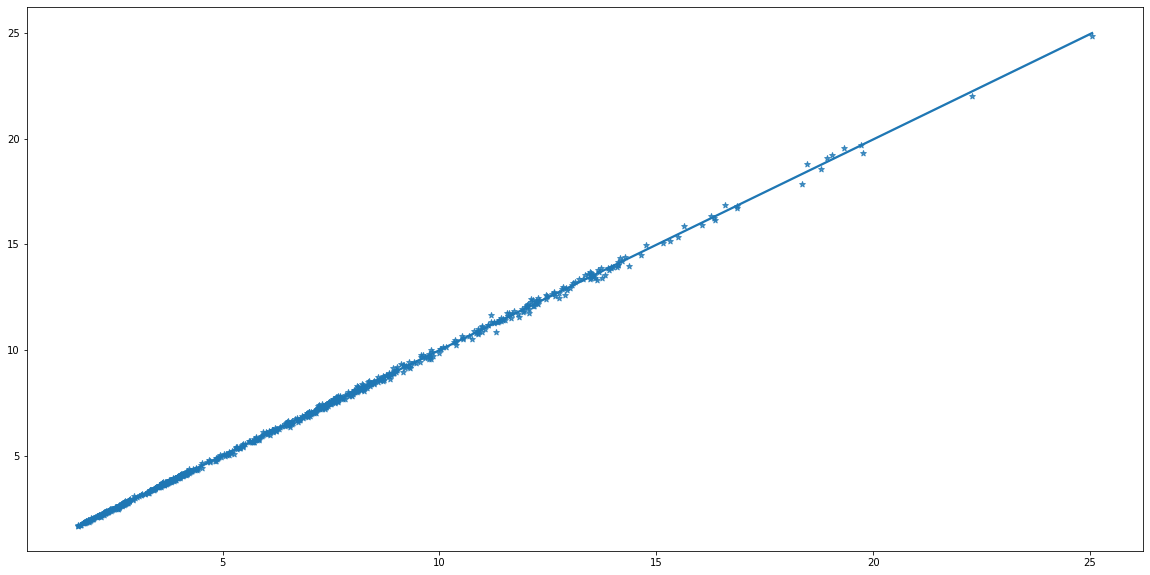

In [44]:
plt.figure(figsize=(20,10))
sns.regplot(y_test,y_pred,marker='*')

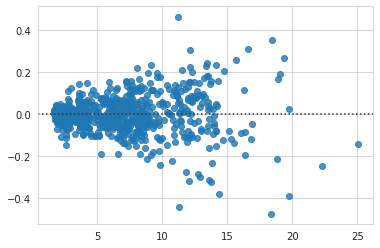

In [65]:
sns.set_style("whitegrid")
sns.residplot(y_test,y_pred)

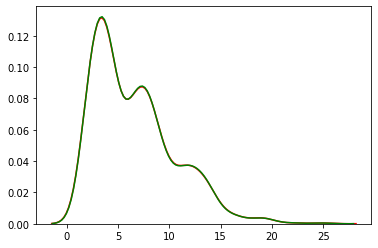

In [33]:
sns.distplot(y_test,hist=False,color='r')
sns.distplot(y_pred,hist=False,color='g')